<a href="https://colab.research.google.com/github/Lipinor/deep_learning_cbpf/blob/master/diabetes_filipe_melo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# save filepath to variable for easier access
diabetes_file_path = '/content/drive/My Drive/Colab Notebooks/data/diabetes.csv'
data = pd.read_csv(diabetes_file_path)
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
X = data.to_numpy()[:,0:8] 
Y = data.to_numpy()[:,8]
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = seed)
print (f'Shape of Train Data : {X_train.shape}')
print (f'Shape of Test Data : {X_test.shape}')

Shape of Train Data : (576, 8)
Shape of Test Data : (192, 8)


# Model description

In [ ]:
model = Sequential([
  Dense(24, activation='relu', input_dim = (8)),
  Dense(12, activation='relu'),
  Dense(1, activation='sigmoid'),
])

model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 24)                216       
_________________________________________________________________
dense_73 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 13        
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


# Model Fitting

In [ ]:
history = model.fit(
  X_train, # training data
  y_train, # training targets
  epochs=150,
  batch_size=32,  
  verbose = 1
)

Epoch 1/150
18/18 [==============================] - 0s 1ms/step - loss: 2.4257 - accuracy: 0.4965
Epoch 2/150
18/18 [==============================] - 0s 991us/step - loss: 1.1525 - accuracy: 0.6562
Epoch 3/150
18/18 [==============================] - 0s 1ms/step - loss: 0.8651 - accuracy: 0.6771
Epoch 4/150
18/18 [==============================] - 0s 1ms/step - loss: 0.7918 - accuracy: 0.6597
Epoch 5/150
18/18 [==============================] - 0s 1ms/step - loss: 0.7302 - accuracy: 0.6753
Epoch 6/150
18/18 [==============================] - 0s 1ms/step - loss: 0.7003 - accuracy: 0.6736
Epoch 7/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6869 - accuracy: 0.6632
Epoch 8/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.6615
Epoch 9/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6587 - accuracy: 0.6684
Epoch 10/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6453 - accuracy: 0.6667
Epoch 1

# Model testing

In [ ]:
scores = model.evaluate(X_test, y_test)
print (f'{model.metrics_names[1]} : {round(scores[1]*100, 2)} %')

6/6 [==============================] - 0s 1ms/step - loss: 0.6540 - accuracy: 0.6615
accuracy : 66.15 %


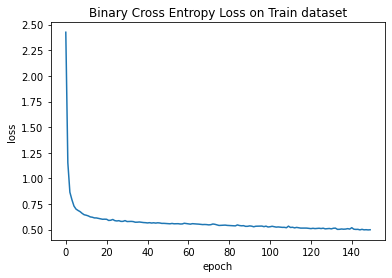

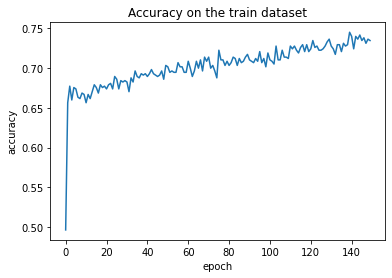

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss
plt.plot(history.history['loss'])
plt.title('Binary Cross Entropy Loss on Train dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Plotting accuracy metric
plt.plot(history.history['accuracy'])
plt.title('Accuracy on the train dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()